In [39]:
import pandas as pd
import scipy.stats as stats
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

1. 수업 시간에 만들었던 df3 데이터를 이용해 아래와 같은 분석을 하고자 한다. 최근성(Recency_int와)가 가장 높은 상위 10% 고객들의 성비와 평균 나이를 계산하시오.
2. 금액(Monetary)이 높은 1000명의 데이터를 추출하여, '사업자구분'에서 '개인'과 '사업자'간 주기성(Frequency)의 대표값의 차이가 있는지 검정하시오.
3. 최근성(Recency_int와)과 금액(Monetary)간의 상관성을 확인하고자 한다. 성별에 따른 최근성과 금액의 산점도를 시각화 하고, 최근성과 금액 간 상관성이 있는지 가설 검정을 수행하시오.
4. '유입경로'의 빈도수가 가장 높은 항목에 대해 Recency_int와 Frequency, Monetary의 기술 통계량을 계산하시오.
5. 회원가입일과 최종접속일 데이터를 이용해 '접속기간'이라는 파생 변수를 생성하고, '접속기간'이 가장 오래된 100명의 고객 명단을 뽑아 result_vip_member.xlsx로 저장하시오.

* ( 가설 검정 문제는 가설 수립 및 결론 도출 까지 진행 )

In [6]:
#1. 수업 시간에 만들었던 df3 데이터를 이용해 아래와 같은 분석을 하고자 한다. 
#최근성(Recency_int와)가 가장 높은 상위 10% 고객들의 성비와 평균 나이를 계산하시오.
df = pd.read_csv('실습 파일/09_Data_df3.csv')
df.head(4)

,나이,성별,최종접속일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,주문자ID,Recency,Frequency,Monetary,Total,Rank
0,45,남자,2016-12-30 오후 5:57,블로그광고,PC,2016-12-30,개인,일반,0V00A1,30,11,678340,339181.2,B
1,53,남자,2017-01-02 오후 12:32,블로그광고,모바일,2017-01-01,개인,일반,1V00A1,153,10,799920,400007.9,B
2,28,남자,2017-02-26 오후 10:52,이메일광고,PC,2017-01-14,사업자,사업자,2V00A1,18,3105,247597550,123799401.4,A
3,44,여자,2017-01-23 오후 6:25,블로그광고,PC,2017-01-17,사업자,사업자,3V00A1,23,24,2826660,1413341.7,A


In [40]:
rank10 = df['Recency']>=df['Recency'].quantile(0.9)
df2 = df.loc[rank10]
len(df2[df2['성별']=='여자'])/len(df2),len(df2[df2['성별']=='남자'])/len(df2)

(0.06854838709677419, 0.9314516129032258)

In [28]:
print('전체 평균 나이 :',df2['나이'].mean())
df2.pivot_table(index='성별', values='나이')

전체 평균 나이 : 39.83870967741935


,나이
성별,
남자,40.047619
여자,37.000000


In [30]:
# 2. 금액(Monetary)이 높은 1000명의 데이터를 추출하여, 
df3 = df.sort_values('Monetary', ascending=False).head(1000)
df3

,나이,성별,최종접속일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,주문자ID,Recency,Frequency,Monetary,Total,Rank
2,28,남자,2017-02-26 오후 10:52,이메일광고,PC,2017-01-14,사업자,사업자,2V00A1,18,3105,247597550,123799401.4,A
182,38,여자,NaN,SNS광고,모바일,2017-06-11,개인,일반,182V00A1,20,267,28488580,14244349.4,A
21,47,남자,2017-02-21 오전 11:08,블로그광고,PC,2017-02-21,사업자,사업자,21V00A1,21,232,22931010,11465557.7,A
50,40,남자,2019-05-13 오후 12:00,인터넷기사광고,PC,2017-03-29,개인,전화주문 고객,50V00A1,22,214,19956830,9978464.4,A
108,50,여자,2017-05-10 오후 12:38,블로그광고,PC,2017-05-10,사업자,사업자,108V00A1,21,295,18373280,9186705.3,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,47,남자,2018-05-10 오후 7:47,잡지광고,모바일,2018-04-28,사업자,사업자,1389V00A1,43,8,679130,339579.5,B
4876,46,남자,2019-01-30 오후 3:19,지인추천,PC,2019-01-29,사업자,일반,4876V00A1,603,5,679060,339711.9,B
252,39,여자,2017-11-27 오후 2:52,SNS광고,모바일,2017-08-02,사업자,사업자,252V00A1,43,13,678390,339210.5,B
0,45,남자,2016-12-30 오후 5:57,블로그광고,PC,2016-12-30,개인,일반,0V00A1,30,11,678340,339181.2,B


In [37]:
#'사업자구분'에서 '개인'과 '사업자'간 주기성(Frequency)의 평균의 차이가 있는지 검정하시오.
# 주문자가 주문일자에 매장을 몇 번왔는지
person = df3[df3['사업자구분']=='개인']['Frequency']
company = df3[df3['사업자구분']=='사업자']['Frequency']

# 정규성 검정
# 두 그룹 모두 정규성을 따르지 않다고 볼 수 있다.
stats.normaltest(person), stats.normaltest(company)

(NormaltestResult(statistic=515.072386083056, pvalue=1.423811419089051e-112),
 NormaltestResult(statistic=907.9680468295886, pvalue=6.874541827277199e-198))

In [38]:
# 정규성을 따르지 않으니 대푯값을 평균에서 중앙값으로 
# p값이 0.05 보다 큼으로 두 집단의 대표값은 같다고 볼 수 있다.
stats.ranksums(person, company)

RanksumsResult(statistic=-0.3395249911682306, pvalue=0.7342142737569468)

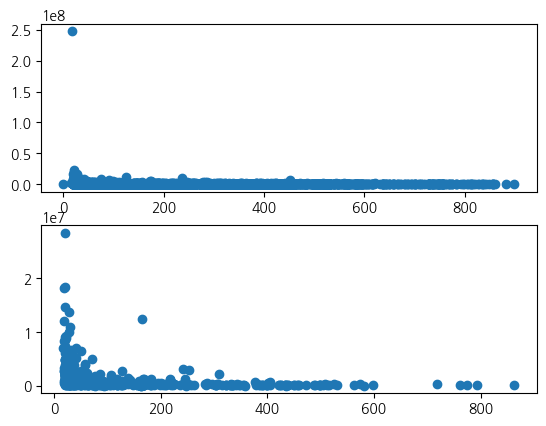

In [63]:
# 3. 최근성(Recency_int와)과 금액(Monetary)간의 상관성을 확인하고자 한다. 
#성별에 따른 최근성과 금액의 산점도를 시각화 하고, 최근성과 금액 간 상관성이 있는지 가설 검정을 수행하시오.
man =  df[df['성별']=='남자'][['Recency','Monetary']]
woman =  df[df['성별']=='여자'][['Recency','Monetary']]

fig = plt.figure()
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

ax1.scatter(data=man, x='Recency', y='Monetary')
ax2.scatter(data=woman, x='Recency', y='Monetary')
plt.show()

In [64]:
# 최근성과 금액 간 상관성이 있는지 가설 검정을 수행하시오.
# 정규성 검정
# 두 변수 모두 p값이 0에 가까움으로, 귀무가설을 기각
# 정규성을 따른다고 볼 수 없다.
stats.normaltest(df['Recency']),stats.normaltest(df['Monetary'])

(NormaltestResult(statistic=1003.4450089983651, pvalue=1.2725792844076955e-218),
 NormaltestResult(statistic=16457.520901727985, pvalue=0.0))

In [65]:
# 정규성을 따르지 않는 두 집단이 상관성 분석은 스피어만 활용
# 상관성 분석
# 두 변수 사이는 p값이 0에 가까움으로, 귀무가설을 기각
# 통계적으로 유의미하지만, 약한 음의 상관관계 존재
stats.spearmanr(df['Recency'], df['Monetary'])

SignificanceResult(statistic=-0.4298024776364492, pvalue=4.6761525865335465e-222)

In [71]:
# 4. '유입경로'의 빈도수가 가장 높은 항목에 대해 Recency_int와 Frequency, Monetary의 기술 통계량을 계산하시오.
idx = df.유입경로.value_counts().idxmax()
idx

'블로그광고'

In [72]:
df[df['유입경로']==idx][['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,952.000000,952.000000,9.520000e+02
mean,113.576681,13.600840,9.576875e+05
std,122.263297,25.226343,1.953218e+06
min,0.000000,1.000000,0.000000e+00
25%,35.000000,2.000000,1.258850e+05
50%,72.000000,5.000000,3.425350e+05
75%,142.000000,14.000000,8.921725e+05
max,856.000000,295.000000,2.293101e+07


In [80]:
# 5. 회원 가입일과 최종접속일 데이터를 이용해 '접속기간'이라는 파생 변수를 생성하고, 
#'접속기간'이 가장 오래된 100명의 고객 명단을 뽑아 result_vip_member.xlsx로 저장하시오.
df['접속기간'] = pd.to_datetime(df['최종접속일'].str.split().str[0]) - pd.to_datetime(df['회원 가입일'])
df

,나이,성별,최종접속일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,주문자ID,Recency,Frequency,Monetary,Total,Rank,접속기간
0,45,남자,2016-12-30 오후 5:57,블로그광고,PC,2016-12-30,개인,일반,0V00A1,30,11,678340,339181.2,B,0 days
1,53,남자,2017-01-02 오후 12:32,블로그광고,모바일,2017-01-01,개인,일반,1V00A1,153,10,799920,400007.9,B,1 days
2,28,남자,2017-02-26 오후 10:52,이메일광고,PC,2017-01-14,사업자,사업자,2V00A1,18,3105,247597550,123799401.4,A,43 days
3,44,여자,2017-01-23 오후 6:25,블로그광고,PC,2017-01-17,사업자,사업자,3V00A1,23,24,2826660,1413341.7,A,6 days
4,40,남자,2018-12-19 오후 1:26,SNS광고,모바일,2017-01-17,사업자,사업자,4V00A1,28,45,2785020,1392527.4,A,701 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,42,남자,2019-04-17 오후 2:17,잡지광고,PC,2019-02-07,사업자,사업자,4952V00A1,540,7,155780,78053.4,D,69 days
4953,44,남자,2019-02-09 오전 12:01,전단지광고,모바일,2019-02-07,사업자,사업자,4953V00A1,539,1,52800,26561.9,D,2 days
4954,35,남자,2019-04-14 오후 2:27,잡지광고,모바일,2019-02-07,사업자,사업자,4954V00A1,539,2,79200,39762.1,D,66 days
4955,24,남자,2019-05-29 오전 10:20,지인추천,모바일,2019-02-07,사업자,사업자,4955V00A1,537,2,86240,43281.5,D,111 days


In [82]:
df4= df.sort_values('접속기간', ascending=False).head(100)
df4

,나이,성별,최종접속일,유입경로,유입기기,회원 가입일,사업자구분,회원구분,주문자ID,Recency,Frequency,Monetary,Total,Rank,접속기간
25,61,여자,2019-05-30 오후 3:28,인터넷기사광고,PC,2017-03-02,개인,일반,25V00A1,25,25,1315760,657892.5,B,819 days
30,40,남자,2019-05-03 오전 4:06,인터넷기사광고,PC,2017-03-08,사업자,사업자,30V00A1,20,56,3289780,1644907.2,A,786 days
50,40,남자,2019-05-13 오후 12:00,인터넷기사광고,PC,2017-03-29,개인,전화주문 고객,50V00A1,22,214,19956830,9978464.4,A,775 days
37,40,남자,2019-05-03 오후 2:15,인터넷기사광고,PC,2017-03-21,사업자,특별회원,37V00A1,36,82,4385860,2192957.2,A,773 days
59,39,여자,2019-05-17 오전 9:49,인터넷기사광고,PC,2017-04-09,사업자,사업자,59V00A1,23,30,1862550,931287.9,A,768 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,36,여자,2019-05-06 오후 12:54,기타,PC,2018-01-11,사업자,사업자,642V00A1,22,17,1714130,857075.0,A,480 days
795,26,남자,2019-05-30 오전 10:55,잡지광고,모바일,2018-02-05,사업자,사업자,795V00A1,29,27,1941760,970894.1,A,479 days
810,40,남자,2019-05-30 오전 9:52,SNS광고,모바일,2018-02-07,개인,일반,810V00A1,22,37,2011500,1005764.0,A,477 days
711,24,남자,2019-05-15 오전 9:08,이메일광고,PC,2018-01-23,개인,전화주문 고객,711V00A1,154,5,226880,113487.2,C,477 days


In [83]:
df4.to_excel("생성 파일/result_vip_member.xlsx")